# 21장. 알고리즘의 성능과 메모리 관리

In [1]:
import matplotlib
matplotlib.rc('font', family="NanumBarunGothicOTF")  

%matplotlib inline

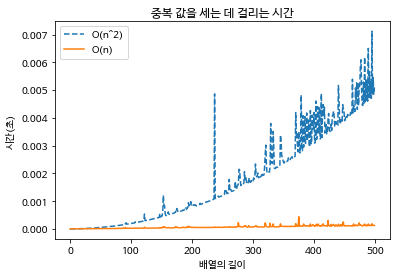

In [6]:
import time
import matplotlib.pyplot as plt
import numpy as np

def duplicates_On2(lst):
    ct = 0
    for x in lst:  # 모든 값의 개수를 한 번씩 센다.
        if lst.count(x) > 1: ct += 1
    return ct

def duplicates_On(lst):
    cts = {}
    for x in lst:  # 딕셔너리를 이용한다.
        if x in cts:
            cts[x] += 1
        else:
            cts[x] = 1

    counts_above_1 = [ct for x, ct in cts.items()
                      if ct > 1]
    return sum(counts_above_1)

def timeit(func, arg):  # 수행 시간을 재는 함수
    start = time.time()
    func(arg)
    stop = time.time()
    return stop - start

times_On, times_On2 = [], []
ns = range(500)
for n in ns:
    lst = list(np.random.uniform(size=n))
    times_On2.append(timeit(duplicates_On2, lst))
    times_On.append(timeit(duplicates_On, lst))

plt.plot(times_On2, "--", label="O(n^2)")
plt.plot(times_On, label="O(n)")
plt.xlabel("배열의 길이")
plt.ylabel("시간(초)")
plt.title("중복 값을 세는 데 걸리는 시간")
plt.legend(loc="upper left")

plt.show()


# 21.4

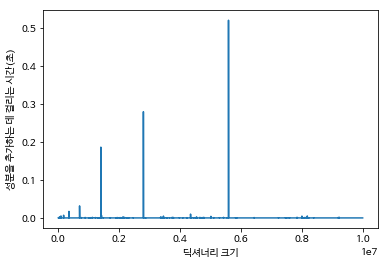

In [7]:
import time
import matplotlib.pyplot as plt

times, d = [], {}
for i in range(10000000):
    start = time.time()
    d[i] = i
    stop = time.time()
    times.append(stop - start)
plt.plot(times)
plt.xlabel("딕셔너리 크기")
plt.ylabel("성분을 추가하는 데 걸리는 시간(초)")
plt.show()


# 21.6

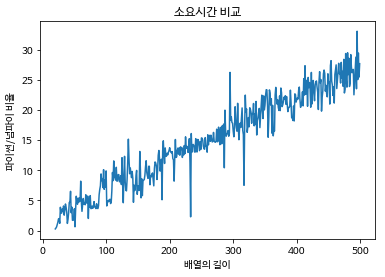

In [8]:
import time, numpy as np, matplotlib.pyplot as plt


def time_numpy(n):  # 넘파이 배열의 연산 시간 측정
    a = np.arange(n)  # 넘파이 배열을 정의한다.
    start = time.time()
    bigger = a + 1
    stop = time.time()
    return stop - start


def time_python(n):  # 파이썬 객체의 연산 시간 측정
    l = range(n)  # 파이썬 리스트를 정의한다.
    start = time.time()
    bigger = [x + 1 for x in l]
    stop = time.time()
    return stop - start

n_trials = 10  # 총 10회 반복해서 테스트
ns = range(20, 500)
ratios = []
for n in ns:
    python_total = sum([time_python(n)
                        for _ in range(n_trials)])
    numpy_total = sum([time_numpy(n)
                       for _ in range(n_trials)])
    ratios.append(python_total / numpy_total)

plt.plot(ns, ratios)
plt.xlabel("배열의 길이")
plt.ylabel("파이썬/넘파이 비율")
plt.title("소요시간 비교")
plt.show()

# 21.8

In [12]:
l = range(10000000)
start = time.time()
_ = sum(l)  # 파이썬 빌트인 함수
stop = time.time()
time_fast = stop - start
start = time.time()

sm = 0.0
for x in l: sm += x  # 직접 구현

stop = time.time()
time_loop = stop - start
print("시간 차이: %5f 배 " % (time_loop / time_fast))

시간 차이: 7.682761 배 


# 21.9

In [17]:
add_nums = lambda a, b: a+b  # 덧셈 함수 정의
l = range(10000000)
start = time.time()
sm = 0
for x in l: sm += x  # 직접 덧셈 수행

stop = time.time()
time_fast = stop - start
start = time.time()
sm = 0
for x in l: sm = add_nums(sm, x)  # 함수 이용

stop = time.time()
time_func = stop - start
print("시간 차이: %5f 배 " % (time_func / time_fast))

시간 차이: 1.679956 배 
